<a href="https://colab.research.google.com/github/Dalya1812/Python_Sentiment_Analysis_Project/blob/master/Amzon_UK_Product_2023_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

asaniczka_amazon_uk_products_dataset_2023_path = kagglehub.dataset_download('asaniczka/amazon-uk-products-dataset-2023')
daliawilliam_amazon_uk_shoes_products_dataset_2021_12_path = kagglehub.dataset_download('daliawilliam/amazon-uk-shoes-products-dataset-2021-12')

print('Data source import complete.')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [ ]:
df = pd.read_csv("/kaggle/input/amazon-uk-shoes-products-dataset-2021-12/amazon_uk_shoes_products_dataset_2021_12.csv")

In [ ]:
df.head()

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021,NaN,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,24/12/2021 02:26:25
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021,NaN,db5a7525-d40b-5265-84d8-df4f29837a3b,24/12/2021 02:26:25
3,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021,NaN,75a42851-6462-54b5-988a-27d336221943,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25


In [ ]:
df = df.sample(n=500)
df.head()

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
4839,https://www.amazon.co.uk/dp/B07NZ2FFXR,"adidas Unisex Babies U_Path J Running Shoe, Cb...",🖤,B-Ware!! Schlechte Verarbeitung,Aufgrund der positiven Resonanz habe ich mir d...,1.0,True,Reviewed in Germany on 17 March 2021,One person found this helpful,4027b29b-0198-5848-b403-623464fa5784,24/12/2021 02:28:41
4653,https://www.amazon.co.uk/dp/B07Z54MDQZ,Ryka Women&#39;s Infinite Plus Walking Black/P...,bittycat,Ryka Infinite shoes are perfect for summer wear,I love these Ryka shoes. I purchased my usual...,5.0,True,Reviewed in the United States on 29 June 2021,NaN,4ebc8772-bb8d-53b7-b086-02b7465fbd75,24/12/2021 02:28:36
1217,https://www.amazon.co.uk/dp/B0812L3RFX,"adidas unisex-child Racer TR 2.0,Ink/Copper/pi...",Katie G.,"No Velcro Strap, as Pictured",This shoe doesn't actually have the velcro str...,2.0,True,Reviewed in the United States on 24 March 2021,One person found this helpful,79cf2ecf-3dfd-59b2-b242-27c3fdf6c313,24/12/2021 02:26:56
5820,https://www.amazon.co.uk/dp/B07NSF1YST,Richter Kinderschuhe Men's Ola Hi-Top Trainers...,Pippi Langstrumpf,Sohle leider viel zu hart,"Die Sohle der Schuhe ist viel zu hart, ich wei...",2.0,True,Reviewed in Germany on 2 December 2020,NaN,074d1114-db1b-5de3-b3bb-b280cc624a1f,24/12/2021 02:29:03
6817,https://www.amazon.co.uk/dp/B06XFT2G2F,"Skechers Kids Boys' Nitrate-95358N Sneaker, Bl...",jen,These shoes are great for the price,These shoes are great for the price. Been lovi...,4.0,True,Reviewed in the United States on 17 October 2017,NaN,c079d22a-0ad1-514f-9937-d650598f7c7d,24/12/2021 02:29:38


ETA****

In [ ]:
df["review_rating"].value_counts()

review_rating
5.0    307
1.0     68
4.0     57
3.0     36
2.0     32
Name: count, dtype: int64

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')  # Download the POS tagger model if needed




[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk

# Ensure text is a string before tokenizing
df["tokens"] = df["review_text"].apply(lambda x: nltk.word_tokenize(str(x)) if isinstance(x, str) else [])

# Apply POS tagging to each list of tokens
df["pos_tags"] = df["tokens"].apply(lambda tokens: nltk.pos_tag(tokens) if tokens else [])
df["pos_tags"].head(10)

4839    [(Aufgrund, NNP), (der, NN), (positiven, NN), ...
4653    [(I, PRP), (love, VBP), (these, DT), (Ryka, NN...
1217    [(This, DT), (shoe, NN), (does, VBZ), (n't, RB...
5820    [(Die, NNP), (Sohle, NNP), (der, NN), (Schuhe,...
6817    [(These, DT), (shoes, NNS), (are, VBP), (great...
453     [(Schicke, NNP), (und, JJ), (bequeme, NN), (Sa...
1755    [(Been, NNP), (wearing, VBG), (ours, NNS), (fo...
1414    [(Too, NNP), (heavy, JJ), (and, CC), (wintery,...
3279    [(Un, NNP), (bel, NN), (paio, NN), (di, NN), (...
2024    [(Although, IN), (these, DT), (are, VBP), (cut...
Name: pos_tags, dtype: object

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("you boring me")

{'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.3182}

In [ ]:
res = {}
for i, row in df.iterrows():
    text = row["review_text"]
    res[i] = sia.polarity_scores(str(text)) if isinstance(text, str) else sia.polarity_scores("")




In [ ]:
vaders = pd.DataFrame(res).T
df = df.reset_index().rename(columns={"index": "Id"})
vaders = vaders.merge(df, how='left', left_index=True, right_index=True)
vaders


,neg,neu,pos,compound,Id,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at,tokens,pos_tags
4839,0.000,1.000,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4653,0.000,0.607,0.393,0.9526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217,0.065,0.815,0.120,0.6632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5820,0.126,0.874,0.000,-0.5994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6817,0.000,0.692,0.308,0.8402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.000,1.000,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,0.000,0.400,0.600,0.4588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5787,0.180,0.820,0.000,-0.5267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2609,0.333,0.667,0.000,-0.4588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df[['Id', 'review_text']].head())
print(vaders[['Id', 'review_text']].head())


     Id                                        review_text
0  4839  Aufgrund der positiven Resonanz habe ich mir d...
1  4653  I love these Ryka shoes.  I purchased my usual...
2  1217  This shoe doesn't actually have the velcro str...
3  5820  Die Sohle der Schuhe ist viel zu hart, ich wei...
4  6817  These shoes are great for the price. Been lovi...
      Id review_text
4839 NaN         NaN
4653 NaN         NaN
1217 NaN         NaN
5820 NaN         NaN
6817 NaN         NaN


<Axes: xlabel='review_rating', ylabel='compound'>

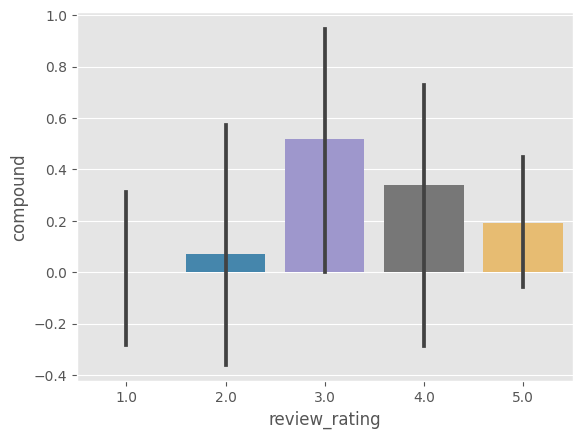

In [ ]:
sns.barplot(data=vaders,x='review_rating', y='compound')

<Axes: xlabel='review_rating', ylabel='pos'>

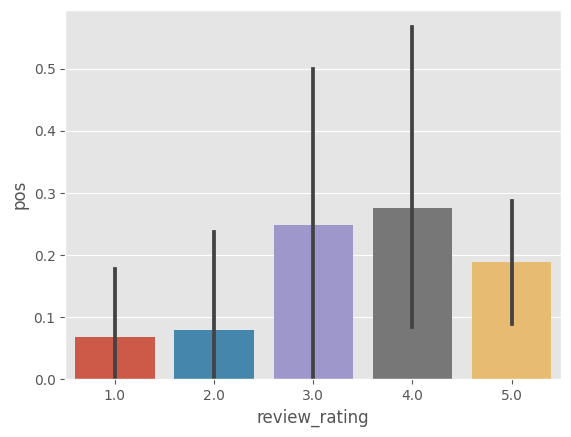

In [ ]:
sns.barplot(data=vaders,x='review_rating', y='pos')

sns.barplot(data=vaders,x='review_rating', y='neg')